# Experiment2 社交网络抽取(Social Network Extraction)

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import requests

## 爬取函数

In [2]:
url = 'http://www.livejournal.com/misc/fdata.bml?user=valerois'
requests.get(url).text

'# Note: Polite data miners cache on their end.  Impolite ones get banned.\n> bagira\n> angerona\n> yankel\n> yelya\n> ponka\n> marinka\n> saper\n> levinius\n> monella\n> irbisa\n> innaplanetyanka\n> hutshepsut\n> skyg74\n> samoleg\n> actr\n> gottfrid\n> krimsky\n> nelis\n> ptfenix\n> leprechaun\n> a_u\n> e_f\n> boctok\n> karial\n> wattson\n> baryshnia\n> ntl\n> salamandrina_\n> ant_fugue\n> levik\n> _milashka\n> oonabond\n> alinaf\n> vollalol\n> kitobow\n> petitmari\n> babushonok\n> koniglio\n> berryl\n> sylphida\n> graier\n> drunk_cherry\n> mamaracha\n> doc_a\n> 3eta\n> togranada\n> vorobeika\n> mel_ny\n> nicety\n> elka_palka\n> milady_winter\n> lengo\n> bengalia\n> stalic\n> asyatka\n> kpoxa_e\n> klaboo\n> azbukivedi\n> pavelrudnev\n> vorodis\n> ranja\n> kirulya\n> zlove\n> charmel\n> krolchatina\n> glagolik\n> _arizonadream_\n> kessil\n> pandausa\n> sunnychka\n> darwen\n> sushile\n> babkaezhka\n> snusmoomrik\n> bills_daughter\n> cute_n_gorgeous\n> fomina\n> zoe_dorogaya\n> ortivika

In [3]:
def read_lj_friends(g, name):
    url = 'http://www.livejournal.com/misc/fdata.bml?user=' + name
    content = requests.get(url).text   
    for line in content.split('\n'):
        # 如果以 '#'，表示是说明
        if line.startswith('#'): continue
        # 格式： "< 名字" (incoming) 或 "> 名字" (outgoing)
        parts=line.split()
        if len(parts)==0: continue
        # 把边添加到网络中
        if parts[0]=='<':
            g.add_edge(parts[1], name)
        else:
            g.add_edge(name, parts[1])

In [4]:
g = nx.Graph()
read_lj_friends(g,'valerois')
len(g) # 计算返回的节点数

302

+ 绘制网络

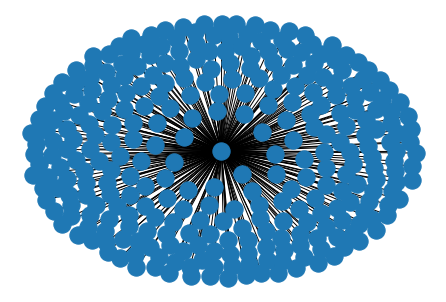

In [5]:
nx.draw(g, with_labels=False) # 隐藏label

## 雪球采样

In [6]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
    print(center, current_depth, max_depth, taboo_list)
    if current_depth == max_depth:
        # 如果我们已经到达搜寻的深度极限，则返回
        print('out of depth')
        return taboo_list
    if center in taboo_list:
        # 如果以前已经访问该节点，则返回
        return taboo_list
    else:
        taboo_list.append(center) # 添加到禁忌表中
        read_lj_friends(g, center) # 调用LiveJournal API并获取节点的数据
        for node in g.neighbors(center):
            # 遍历中心节点的所有好友，递归调用snowball_sampling
            taboo_list = snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
        return taboo_list

In [7]:
g=nx.Graph()
snowball_sampling(g, 'kozel_na_sakse', max_depth=1) # 最大深度为1，即抓一级朋友

kozel_na_sakse 0 1 []
cr 1 1 ['kozel_na_sakse']
out of depth
saper 1 1 ['kozel_na_sakse']
out of depth
ptfenix 1 1 ['kozel_na_sakse']
out of depth
guy_gomel 1 1 ['kozel_na_sakse']
out of depth
klari 1 1 ['kozel_na_sakse']
out of depth
dachte 1 1 ['kozel_na_sakse']
out of depth
solo_oboroten 1 1 ['kozel_na_sakse']
out of depth
zina_korzina 1 1 ['kozel_na_sakse']
out of depth
kirulya 1 1 ['kozel_na_sakse']
out of depth
letchikleha 1 1 ['kozel_na_sakse']
out of depth
usolt 1 1 ['kozel_na_sakse']
out of depth
jolita 1 1 ['kozel_na_sakse']
out of depth
periskop 1 1 ['kozel_na_sakse']
out of depth
valerois 1 1 ['kozel_na_sakse']
out of depth
cher_no_more 1 1 ['kozel_na_sakse']
out of depth
to_to_i_ono_to 1 1 ['kozel_na_sakse']
out of depth
cheese_people 1 1 ['kozel_na_sakse']
out of depth
olga_mama 1 1 ['kozel_na_sakse']
out of depth
gde_moi_mozgi 1 1 ['kozel_na_sakse']
out of depth
tanyakotova 1 1 ['kozel_na_sakse']
out of depth
sovarh 1 1 ['kozel_na_sakse']
out of depth
oshestak 1 1 ['koze

['kozel_na_sakse']

In [8]:
len(g) # 计算返回的节点数

33

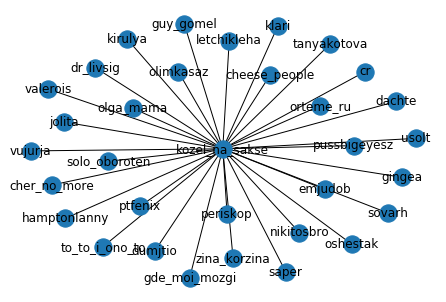

In [9]:
nx.draw(g, with_labels=True)

## 保存和加载数据集

### 保存数据

In [10]:
nx.write_pajek(g, './data/livejournal.net')

In [12]:
nx.write_gexf(g, "./data/livejournal.gexf")